In [3]:
"""
This is the template file for the statistics and trends assignment.
You will be expected to complete all the sections and
make this a fully working, documented file.
You should NOT change any function, file or variable names,
if they are given to you here.
Make use of the functions presented in the lectures
and ensure your code is PEP-8 compliant, including docstrings.
"""
from corner import corner
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns


In [5]:
def plot_relational_plot(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=df, x='year', y='price', ax=ax)
    ax.set_title('BMW Car Price vs Year')
    plt.tight_layout()
    plt.show()
    plt.close()
    return

In [6]:
def plot_categorical_plot(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    top_models = df['model'].value_counts().head(10)
    sns.barplot(x=top_models.values, y=top_models.index, ax=ax)
    ax.set_title('Top 10 BMW Models by Count')
    ax.set_xlabel('Count')
    ax.set_ylabel('Model')
    plt.tight_layout()
    plt.show()
    plt.close()
    return


In [7]:
def plot_statistical_plot(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap for Numeric BMW Attributes')
    plt.tight_layout()
    plt.show()
    plt.close()
    return


In [8]:
def statistical_analysis(df, col: str):
    """Calculates the four statistical moments for a column."""
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col].dropna())
    excess_kurtosis = ss.kurtosis(df[col].dropna())
    return mean, stddev, skew, excess_kurtosis


In [9]:
def preprocessing(df):
    """Preprocesses data by cleaning and exploring."""
    print("Initial Data Overview:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())
    df = df.dropna(subset=['price'])
    print("\nCorrelation Matrix:")
    print(df.corr(numeric_only=True))
    return df


In [10]:
def writing(moments, col):
    """Prints analysis results."""
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:.2f}, '
          f'Skewness = {moments[2]:.2f}, and '
          f'Excess Kurtosis = {moments[3]:.2f}.')

    skew_type = "right skewed" if moments[2] > 0 else "left skewed" if moments[2] < 0 else "not skewed"
    if moments[3] > 0:
        kurtosis_type = "leptokurtic"
    elif moments[3] < 0:
        kurtosis_type = "platykurtic"
    else:
        kurtosis_type = "mesokurtic"
    print(f"The data was {skew_type} and {kurtosis_type}.")
    return


In [11]:
def main():
    df = pd.read_csv('bmw.csv')
    df = preprocessing(df)
    col = 'price'  # Choose your numeric column for analysis
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)
    moments = statistical_analysis(df, col)
    writing(moments, col)
    return


Initial Data Overview:
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  

Summary Statistics:
               year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.

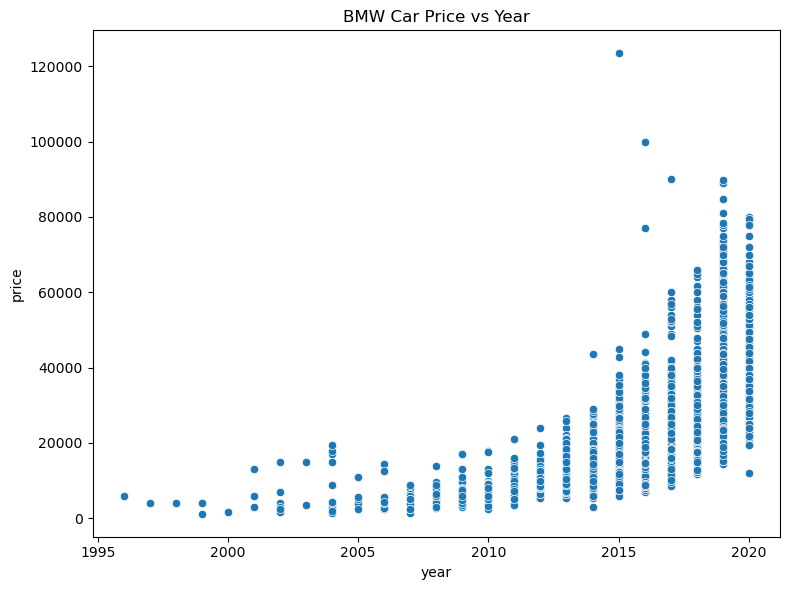

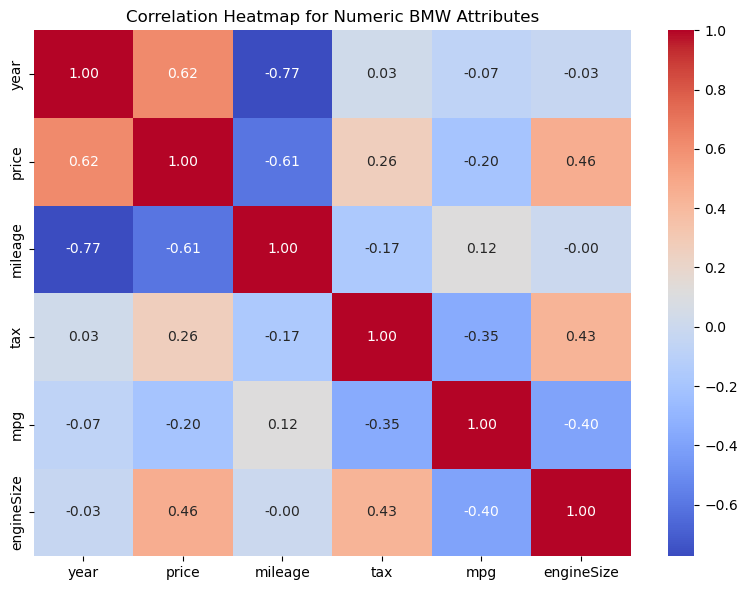

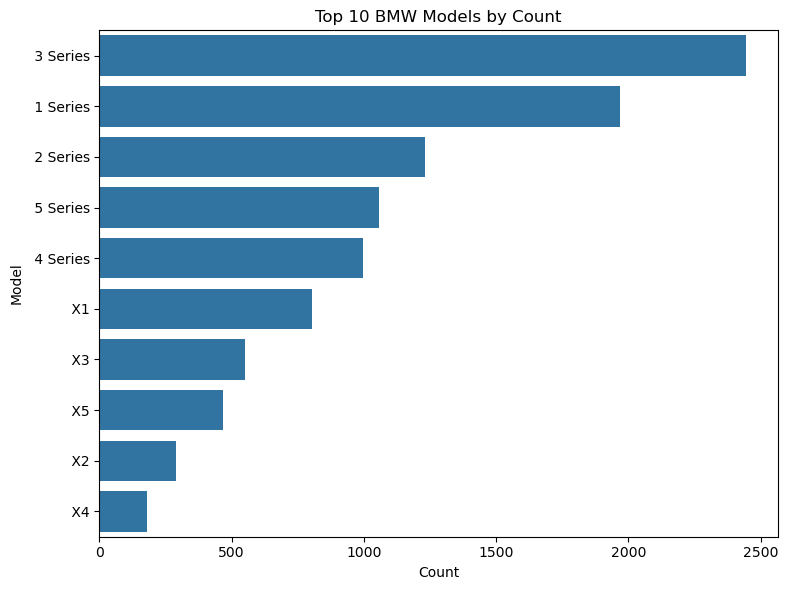

For the attribute price:
Mean = 22733.41, Standard Deviation = 11415.53, Skewness = 1.59, and Excess Kurtosis = 4.02.
The data was right skewed and leptokurtic.


In [12]:

if __name__ == '__main__':
    main()